In [2]:
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt


### 1. Przygotuj zbiór uczący i walidacyjny, wykorzystując dołączony do listy kod procedury ekstrakcji cech. Jeśli zamierzasz korzystać z Weki, zalecane jest wykonanie jednorazowego przekształcenia danych i eksportu do jednego ze zgodnych formatów. 

In [3]:
# pip install xlrd
ratings_data = pd.read_excel('jester-data-1.xls', header=None)
ratings_data = ratings_data.iloc[:, 1:].replace(99, float('nan'))
ratings = ratings_data.mean()

In [4]:
# print(ratings_data)
# print(ratings)
print('lowest rating: ', ratings.min())
print('highest rating: ', ratings.max())

lowest rating:  -3.8338796373689963
highest rating:  3.6650848950824924


In [5]:
from bs4 import BeautifulSoup

list_of_jokes = []

for i in range(1, 101):
    file_name = f'jokes/init{i}.html'
    with open(file_name, 'r') as file:
        joke = file.read()
        soup = BeautifulSoup(joke, 'html.parser')
        joke_text = soup.find('font', size='+1').text.strip()
        list_of_jokes.append(joke_text)

In [6]:
# # display first 5 jokes
# for item in list_of_jokes[:5]:
#     print(item)
#     print('--------------------------------------------')

# # or display all of them
# for i in list_of_jokes:
#     print(i)
#     print('--------------------------------------------')

In [7]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('bert-base-cased')
embeddings = model.encode(list_of_jokes)

c:\Users\505ry\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
No sentence-transformers model found with name C:\Users\505ry/.cache\torch\sentence_transformers\bert-base-cased. Creating a new one with MEAN pooling.
Some weights of the model checkpoint at C:\Users\505ry/.cache\torch\sentence_transformers\bert-base-cased were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertFo

In [8]:
# # display first 5 embeddings
# for item in embeddings[:5]:
#     print(item)
#     print('--------------------------------------------')

# # or display all of them
# for i in embeddings:
#     print(i)
#     print('--------------------------------------------')

In [9]:
# normalize embeddings
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
standarized_embeddings = scaler.fit_transform(embeddings)
# scaler = MinMaxScaler()
# standarized_embeddings = scaler.fit_transform(embeddings)


In [10]:
# # display first 5 normalized embeddings
# print(standarized_embeddings[:5])

# # or display all of them
# for i in embeddings:
#     print(i)
#     print('--------------------------------------------')

In [11]:
# split data to train and validation sets
train_x, validation_x, train_y, validation_y = train_test_split(
    # standarized_embeddings,
    standarized_embeddings,  
    ratings, 
    test_size=0.2, 
    random_state=3)

In [12]:
# print('embeddings shape:', embeddings.shape)
# print('ratings shape:', ratings.shape)
# print('list_of_jokes shape:', len(list_of_jokes))

# print('Train x shape:', train_x.shape)
# print('Train y shape:', train_y.shape)
# print('Validation x shape:', validation_x.shape)
# print('Validation y shape:', validation_y.shape)

In [13]:
# "istotne jest, by zacząć eksperymenty od możliwie jak najbardziej surowej sieci neuronowej. Jeśli korzystasz z Pythona i pakietu sklearn, konkretnie klasy sklearn.neural network.MLPRegressor, upewnij się, że przekazujesz następujące wartości hiperparametrów: "
solver = 'sgd'
alpha = 0.0
learning_rate = 'constant'

from sklearn.neural_network import MLPRegressor

def run(learning_rate_param=0.001, hidden_sizes=100, epochs = 1000) -> list:
    mlp = MLPRegressor(solver = solver, 
                       alpha = alpha, 
                       learning_rate = learning_rate,
                       learning_rate_init = learning_rate_param, 
                       hidden_layer_sizes = hidden_sizes,
                       random_state = 0
                       )
    train_loss = []
    validation_loss = []

    for epoch in range(epochs):
        mlp.partial_fit(train_x, train_y)

        pred_train_y = mlp.predict(train_x)
        train_loss.append(mean_squared_error(train_y, pred_train_y))

        pred_validation_y = mlp.predict(validation_x)
        validation_loss.append(mean_squared_error(validation_y, pred_validation_y))

    loss_curve = mlp.loss_curve_

    return (train_loss, validation_loss, loss_curve)


### 2. Przetestuj działanie podstawowego modelu MLP o domyślnej konfiguracji hiperparametrów, ucząc go na danych ze zbioru Jester. Prześledź zachowanie modelu w czasie, wizualizując wartość funkcji kosztu w funkcji liczby epok, zwracając uwagę na wartości dla zbioru uczącego i zbioru walidacyjnego.

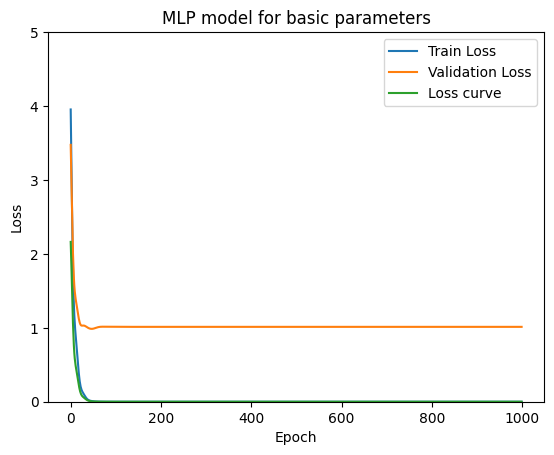

In [14]:
loss_train, loss_validation, loss_curve = run()

plt.plot(range(len(loss_train)), loss_train, label=f'Train Loss')
plt.plot(range(len(loss_validation)), loss_validation, label=f'Validation Loss')
plt.plot(range(len(loss_curve)), loss_curve, label=f'Loss curve')
plt.title('MLP model for basic parameters')
# plt.ylim(0, 5)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [15]:
# # display first 5 of each loss data
# for i in range(5):
#     print(f'Train loss: {loss_train[i]}','\t\t' f'Validation loss: {loss_validation[i]}', '\t', f'Loss curve: {loss_curve[i]}')

# # or display all of them
# for i in range(len(loss_train)):
#     print(f'Train loss: {loss_train[i]}','\t\t' f'Validation loss: {loss_validation[i]}', '\t', f'Loss curve: {loss_curve[i]}')
#     print('--------------------------------------------')

### 3. Zbadaj wpływ tempa uczenia (learning rate) na osiągane wyniki: powtórz uczenie dla 3 różnych wartości parametru. Dobierz odpowiednią długość procesu uczenia (liczbę epok) jeśli to konieczne. Przedstaw wyniki na wykresach jak w zadaniu poprzednim. Co dzieje się, gdy tempo uczenia jest zbyt niskie? Co, gdy zbyt wysokie?

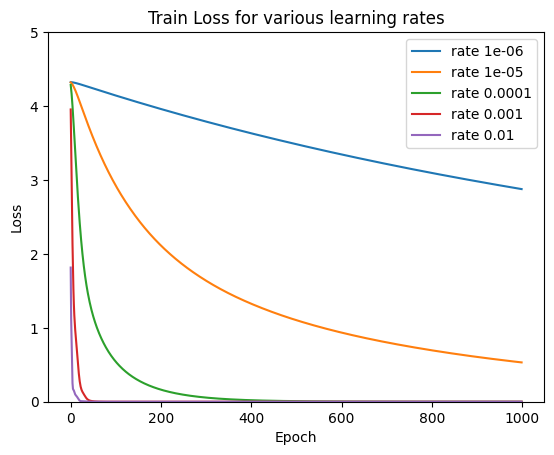

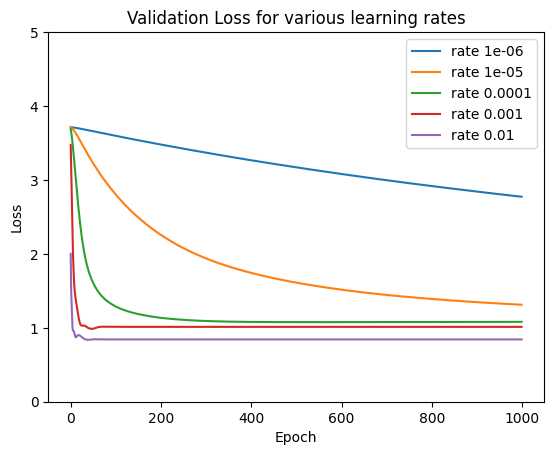

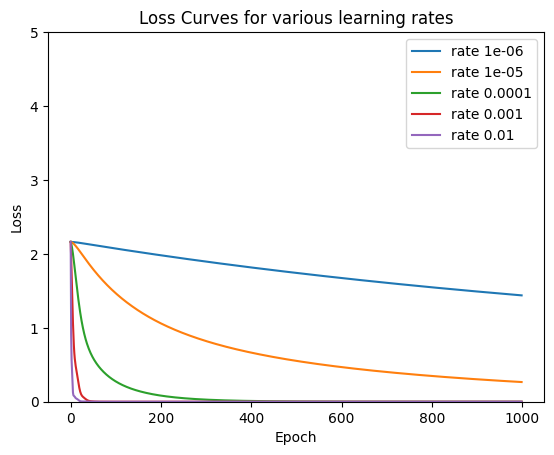

In [16]:
learning_rates = [0.000001, 0.00001, 0.0001, 0.001, 0.01]  # , 0.1]  # too fast learning rate may lead to breaking the code

validation_losses = []
loss_curves = []

for lr in learning_rates:
    train_loss, validation_loss, loss_curve = run(learning_rate_param = lr, epochs = 1000)
    validation_losses.append(validation_loss)
    loss_curves.append(loss_curve)
    plt.plot(range(len(train_loss)), train_loss, label=f'rate {lr}')
plt.title('Train Loss for various learning rates')
plt.ylim(0, 5)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
    
for validations, lr in zip(validation_losses, learning_rates):
    plt.plot(range(len(validations)), validations, label=f'rate {lr}')
plt.title('Validation Loss for various learning rates')
plt.ylim(0, 5)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
    
for curve, lr in zip(loss_curves, learning_rates):
    plt.plot(range(len(curve)), curve, label=f'rate {lr}')
plt.title('Loss Curves for various learning rates')
plt.ylim(0, 5)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [17]:
train_loss, validation_loss, loss_curve = run(learning_rate_param = 0.01)
# time: 4.0s

In [18]:
train_loss, validation_loss, loss_curve = run(learning_rate_param = 0.001)
# time: 4.2s

In [19]:
train_loss, validation_loss, loss_curve = run(learning_rate_param = 0.0001)
# time: 4.3s

In [20]:
train_loss, validation_loss, loss_curve = run(learning_rate_param = 0.00001)
# time: 4.3s

In [21]:
train_loss, validation_loss, loss_curve = run(learning_rate_param = 0.000001)
# time: 4.1s

Przy zbyt niskim tępie nauki, nie można osiągnąć zadowalających wyników przewidywanych wartości, nawet po kilkurtotnie dłuższym czasie nauki
- dla learning_rate_init = 0.001 wystarczy około 50 epok do dotarcia do idealnego stanu nauczenia, 
- dla learning_rate_init = 0.000001 nawet przy 2000 epok nie da się osiągnąć zbliżonego efektu

Co do za wysokiego tempa nauki (0.1) system dostaje za wysokie wartości i wszystko kończy się błędem
Dodatkowo samo tempo nauki nie przekłąda się prawie wcale na czas wykonywania predykcji

In [22]:
# for lr in learning_rates:
#     loss_train, loss_validation, loss_curve = run(learning_rate_param=lr)
#     plt.plot(range(len(loss_train)), loss_train, label=f'Train Loss')
#     plt.plot(range(len(loss_validation)), loss_validation, label=f'Validation Loss')
#     plt.plot(range(len(loss_curve)), loss_curve, label=f'Loss curve')
#     plt.title(f'Learning Rate {lr}')
#     # plt.ylim(0, 5)
#     plt.xlabel('Epoch')
#     plt.ylabel('Loss')
#     plt.legend()
#     plt.show()


### 4. Zbadaj wpływ rozmiaru modelu MLP na jakość działania: wykonaj co najmniej 3 eksperymenty dla modeli różniących się liczbą neuronów. Kiedy model przestaje dobrze dopasowywać się do danych? Kiedy zaczyna zanadto dopasowywać się do zbioru uczącego?

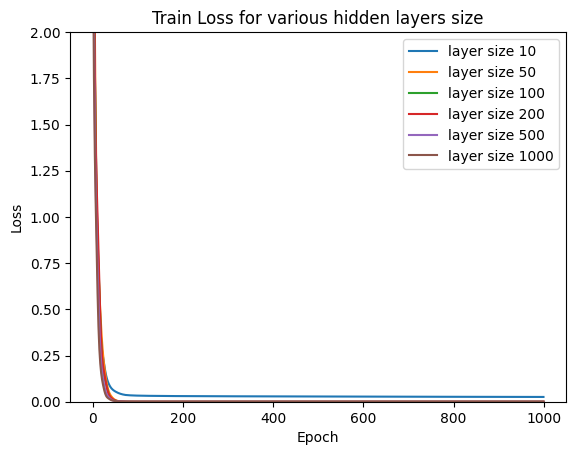

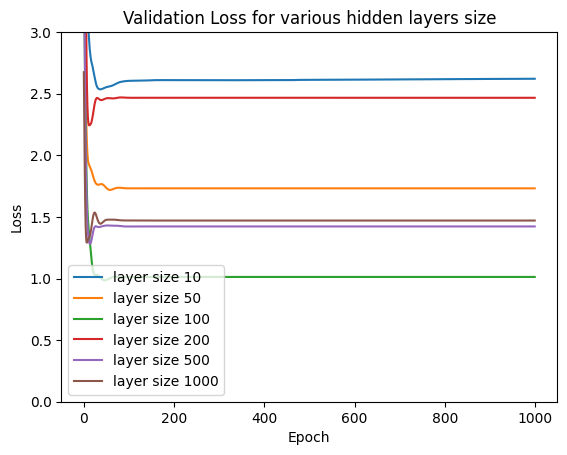

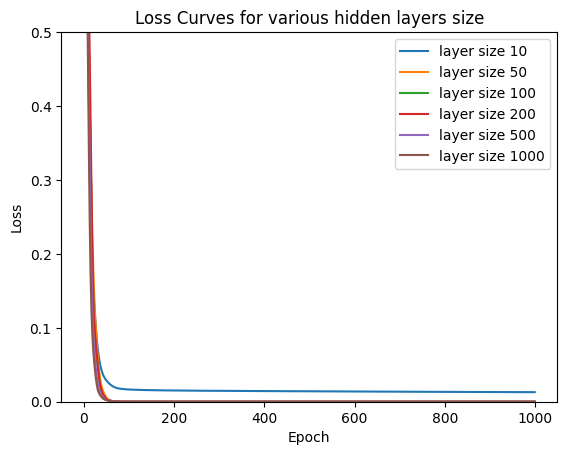

In [23]:
hidden_layer_sizes = [10, 50, 100, 200, 500, 1000]

validation_losses = []
loss_curves = []

for size in hidden_layer_sizes:
    train_loss, validation_loss, loss_curve = run(hidden_sizes=size)
    validation_losses.append(validation_loss)
    loss_curves.append(loss_curve)
    plt.plot(range(len(train_loss)), train_loss, label=f'layer size {size}')
plt.title('Train Loss for various hidden layers size')
plt.ylim(0, 2)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
    
for validations, size in zip(validation_losses, hidden_layer_sizes):
    plt.plot(range(len(validations)), validations, label=f'layer size {size}')
plt.title('Validation Loss for various hidden layers size')
plt.ylim(0, 3)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
    
for curve, size in zip(loss_curves, hidden_layer_sizes):
    plt.plot(range(len(curve)), curve, label=f'layer size {size}')
plt.title('Loss Curves for various hidden layers size')
plt.ylim(0, 0.5)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [24]:
train_loss, validation_loss, loss_curve = run(hidden_sizes=100)
# time: 4.7s

In [25]:
train_loss, validation_loss, loss_curve = run(hidden_sizes=500)
# time: 17.6s

In [26]:
train_loss, validation_loss, loss_curve = run(hidden_sizes=1000)
# time: 36.1s

In [27]:
train_loss, validation_loss, loss_curve = run(hidden_sizes=10)
# time: 2,7s

In [28]:
train_loss, validation_loss, loss_curve = run(hidden_sizes=50)
# time: 3.2s

In [29]:
train_loss, validation_loss, loss_curve = run(hidden_sizes=200)
# time: 8.7s

Najlepsze wyniki osiągnęły sieci o liczbie neuronów kolejno: 100, 500, 1000, 50, 200, 10

Jak widać większa liczba neuronów nie zawsze oznacza lepsze wyniki, jednakże mniejsza liczba neuronów skraca czas dokonywania przewidywań

In [30]:
# for size in hidden_layer_sizes:
#     train_loss, validation_loss, loss_curve = run(hidden_sizes=size)
#     plt.plot(range(len(loss_train)), loss_train, label=f'Train Loss')
#     plt.plot(range(len(loss_validation)), loss_validation, label=f'Validation Loss')
#     plt.plot(range(len(loss_curve)), loss_curve, label=f'Loss curve')
#     plt.title(f'Layer Size {size}')
#     # plt.ylim(0, 5)
#     plt.xlabel('Epoch')
#     plt.ylabel('Loss')
#     plt.legend()
#     plt.show()


### 5. Wybierz najlepszy uzyskany w drodze powyższych eksperymentów model i przetestuj go w praktyce: znajdź (lub napisz własny) tekst o charakterze dowcipu, przetwórz go na wektor za pomocą używanej w zadaniach metody ekstrakcji cech, a następnie odpytaj model neuronowy. Czy predykcja zgadza się z Twoim oczekiwaniem?

In [31]:
my_mlp = MLPRegressor(solver = solver, 
                    alpha = alpha, 
                    learning_rate = learning_rate,
                    learning_rate_init = 0.01, 
                    hidden_layer_sizes = 100,
                    random_state = 0
                    )

for i in range(100):
    my_mlp.fit(train_x, train_y)

In [32]:
def rate_my_joke(joke):
    joke_embedding = model.encode([joke])
    # print(joke_embedding)
    # joke_embedding = scaler.fit_transform(joke_embedding)
    rating_prediction = my_mlp.predict(joke_embedding)
    print('Joke rating prediction:', rating_prediction)

def rate_array(jokes):
    for joke in jokes:
        print(joke)
        rate_my_joke(joke)
        print('--------------------------------------------')

In [33]:
dad_jokes = [
    "I'm afraid for the calendar. Its days are numbered.",
    "My wife said I should do lunges to stay in shape. That would be a big step forward.",
    "Why do fathers take an extra pair of socks when they go golfing? In case they get a hole in one!",
    "Singing in the shower is fun until you get soap in your mouth. Then it's a soap opera.",
    "What do a tick and the Eiffel Tower have in common? They're both Paris sites.",
    "What do you call a fish wearing a bowtie? Sofishticated.",
    "How do you follow Will Smith in the snow? You follow the fresh prints.",
    "If April showers bring May flowers, what do May flowers bring? Pilgrims.",
    "I thought the dryer was shrinking my clothes. Turns out it was the refrigerator all along.",
    "How does dry skin affect you at work? You don’t have any elbow grease to put into it."
]
rate_array(dad_jokes)

quotes = table = [
    "A rose by any other name would smell as sweet.", "William Shakespeare", "English",
    "All that glitters is not gold.", "William Shakespeare", "English",
    "All the world’s a stage, and all the men and women merely players.", "William Shakespeare", "English",
    "Ask not what your country can do for you; ask what you can do for your country.", "John Kennedy", "English",
    "Ask, and it shall be given you; seek, and you shall find.", "the Bible", "Greek",
    "Eighty percent of success is showing up.", "Woody Allen", "English",
    "Elementary, my dear Watson.", "Sherlock Holmes (character)", "English",
    "For those to whom much is given, much is required.", "the Bible", "Greek",
    "Frankly, my dear, I don't give a damn.", "Rhett Butler (character)", "English"
]
rate_array(quotes)

some_good_jokes = [
    "Once, my father came home and found me in front of a roaring fire. That made my father very mad, as we didn’t have a fireplace.",
    "With a pile of 300 resumes on his desk and a need to pick someone quickly, my boss told me to make calls on 50 and toss the rest. Throw away 250 resumes?” I asked, shocked. “What if the best candidates are in there? You have a point,” he said. “But then again, I don’t need people with bad luck around here",
    "What do you call it when a snowman throws a tantrum? A meltdown.",
    "I'm so good at sleeping I can do it with my eyes closed!"
]
rate_array(some_good_jokes)

I'm afraid for the calendar. Its days are numbered.
Joke rating prediction: [0.08182052]
--------------------------------------------
My wife said I should do lunges to stay in shape. That would be a big step forward.
Joke rating prediction: [0.2364158]
--------------------------------------------
Why do fathers take an extra pair of socks when they go golfing? In case they get a hole in one!
Joke rating prediction: [0.18984309]
--------------------------------------------
Singing in the shower is fun until you get soap in your mouth. Then it's a soap opera.
Joke rating prediction: [0.10857341]
--------------------------------------------
What do a tick and the Eiffel Tower have in common? They're both Paris sites.
Joke rating prediction: [0.12563685]
--------------------------------------------
What do you call a fish wearing a bowtie? Sofishticated.
Joke rating prediction: [-0.04153648]
--------------------------------------------
How do you follow Will Smith in the snow? You follow 

### 6. ⋆ Wykonaj badanie dowolnego innego parametru, np. regularyzacji. Jakie jest jego działanie? Z jakim problemem pozwala on walczyć? Jak wpływa na wyniki? 

analiza nieudana, nie widzę(przynajmniej na razie) jaki wpływ ma parametr alpha na przewidywanie wartości
nie trzeba sprawdzać zadania 6

In [37]:
def test_alphas(given_alpha):
    mlp = MLPRegressor(solver = solver, 
                       alpha = given_alpha, 
                       learning_rate = learning_rate,
                       learning_rate_init = 0.001, 
                       hidden_layer_sizes = 100,
                       random_state = 0
                       )

    train_loss = []
    validation_loss = []

    for epoch in range(100):
        mlp.partial_fit(train_x, train_y)

        pred_train_y = mlp.predict(train_x)
        train_loss.append(mean_squared_error(train_y, pred_train_y))

        pred_validation_y = mlp.predict(validation_x)
        validation_loss.append(mean_squared_error(validation_y, pred_validation_y))

    loss_curve = mlp.loss_curve_

    return (train_loss, validation_loss, loss_curve)

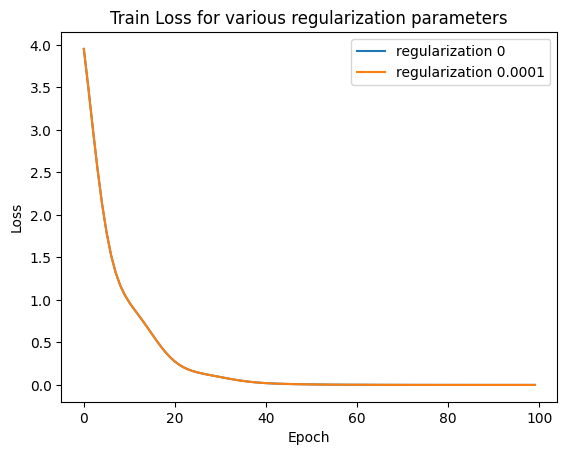

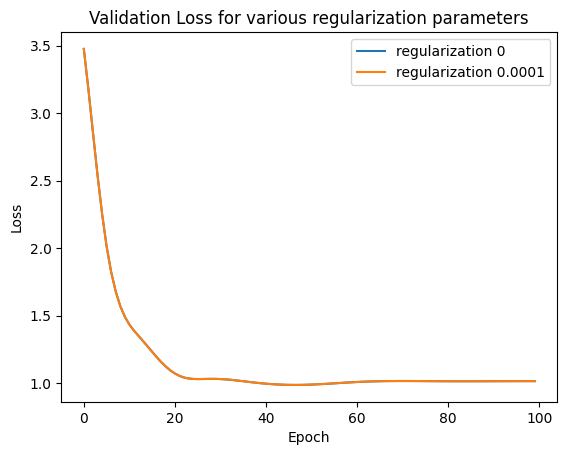

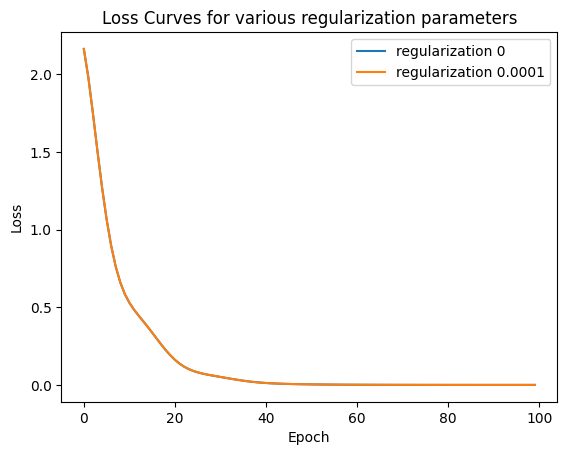

In [39]:
alphas = [0, 0.0001]#, 0.001, 0.01, 0.1]

validation_losses = []
loss_curves = []

for alpha in alphas:
    train_loss, validation_loss, loss_curve = test_alphas(given_alpha = alpha)
    validation_losses.append(validation_loss)
    loss_curves.append(loss_curve)
    plt.plot(range(len(train_loss)), train_loss, label=f'regularization {alpha}')
plt.title('Train Loss for various regularization parameters')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
    
for validations, alpha in zip(validation_losses, alphas):
    plt.plot(range(len(validations)), validations, label=f'regularization {alpha}')
plt.title('Validation Loss for various regularization parameters')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
    
for curve, alpha in zip(loss_curves, alphas):
    plt.plot(range(len(curve)), curve, label=f'regularization {alpha}')
plt.title('Loss Curves for various regularization parameters')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()